In [15]:
from numpy import linalg
import numpy as np
from math import *
from cmath import *
import cmath
import matplotlib.pyplot as plt

Reflectance and Transmittance Values: 
R =  (0.6774420628343364+0.6958881648197852j)
T =  (0.045408259970972496-0.23398718659986248j)


Conservation of Energy: 
delta=  (2.0816681711721685e-16+0j)


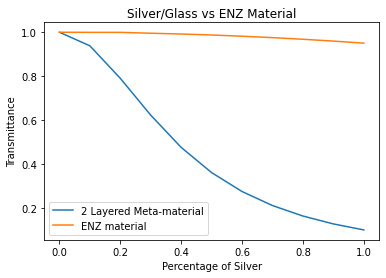

In [22]:
def TM_four_layer_solver():
    lmda = 0.700
    h = 0.1/2*1.0
    k0 = 2*pi/lmda
    ku = 1*k0
    kv1 = cmath.sqrt(-2.2)*k0  #Permativity of Silver is about -23
    kv2 = cmath.sqrt(-23) *k0   #Permativity of Glass is about 2.2
    kw = cmath.sqrt(1)*k0
    
    a1 = 0
    a2 = -h/2
    a3 = -h
    
    tao1 = (ku**2)/(kv1**2)
    tao2 = (kv1**2)/ (kv2**2)
    tao3 = (kv2**2)/ (kw**2)
    
    Cu = cos(ku*a1)
    Su = sin(ku*a1)
    
    Cv1a1 = cos(kv1*a1)
    Sv1a1 = sin(kv1*a1)
    Cv1a2 = cos(kv1*a2)
    Sv1a2 = sin(kv1*a2)
    
    Cv2a2 = cos(kv2*a2)
    Sv2a2 = sin(kv2*a2)
    Cv2a3 = cos(kv2*a3)
    Sv2a3 = sin(kv2*a3)
    
    Cw = cos(kw*a3)
    Sw = sin(kw*a3)
    
    nrow1 = [complex(Cu,Su), complex(-Cv1a1,Sv1a1),complex(-Cv1a1,-Sv1a1),0,0,0]
    nrow2 = [ku*(complex(Cu,Su)),tao1*kv1*(complex(Cv1a1, -Sv1a1)),
            tao1*kv1*(complex(-Cv1a1,-Sv1a1)),0,0,0]
    nrow3 = [0, complex(Cv1a2,-Sv1a2), complex(Cv1a2,Sv1a2),
            complex(-Cv2a2,Sv2a2), complex(-Cv2a2,-Sv2a2), 0 ]
    nrow4 = [0,kv1* complex(-Cv1a2,Sv1a2),kv1*complex(Cv1a2,Sv1a2),
            tao2*kv2*complex(Cv2a2,-Sv2a2), tao2*kv2*complex(-Cv2a2,-Sv2a2), 0]
    nrow5 = [0,0,0,complex(Cv2a3,-Sv2a3), complex(Cv2a3,Sv2a3), complex(-Cw,Sw)]
    nrow6 = [0,0,0, kv2*complex(-Cv2a3,Sv2a3), kv2*complex(Cv2a3,Sv2a3), tao3*kw* complex(Cw,-Sw)]
    
    
    nmat = np.array([nrow1,nrow2,nrow3,nrow4,nrow5,nrow6])
    cons = np.array([complex(-Cu,Su), ku*(complex(Cu,-Su)),0,0,0,0])
    
    
    answer = np.linalg.solve(nmat, cons)
    Rval = answer[0]
    D1val = answer[1]
    U1val = answer[2]
    D2val = answer[3]
    U2val = answer[4]
    Tval = answer[5]
    
    print("Reflectance and Transmittance Values: ")
    print("R = ",Rval)
    print("T = ",Tval)
    #print("D1 = ",D1val)
    #print("U1 = ",U1val)
    #print("D2 = ", D2val)
    #print("U2 = ",U2val)
    
    
    #Conservation of Energy 
    eu = (abs(Rval))**2
    ew = (kw/ku)*(abs(Tval)**2)
    
    delta = 1 - eu - (ku**2/kw**2)*ew
    print("\n")
    print("Conservation of Energy: ")
    print("delta= ", delta)
    
def graph_plot():
    P1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    T1 = [0.9999999999999996,0.9384076579820084,
         0.7905907703317033,0.6231082548491449,
         0.47667332326623363,0.3620531297902782,
         0.2760763820156858,0.2122541242251262,
         0.16468021311102665,0.12885665780945607,
        0.10155709411010241]
    plt.plot(P1,T1, label = "2 Layered Meta-material")
    
    P2 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    T2 = [0.999999999996626,0.9994965337635457,
          0.9994965337635457,0.9954748751107413,
          0.9919647447500362,0.9874637502172039,
          0.9819808004934081,0.9755266615560602,
          0.9681138871142562,0.9597567408200651,
         0.9504711112950164]
    plt.plot(P2,T2, label = "ENZ material")
    
    
    plt.xlabel('Percentage of Silver')
    plt.ylabel('Transmittance')
    plt.title('Silver/Glass vs ENZ Material')
    plt.legend()
    plt.show()
    
def main():
    TM_four_layer_solver()
    graph_plot()
    
main()